# **DL Assignment No. 2**

Name : Khedkar Prajwal Ramdas       

Class : BE Computer A

Batch : D

Roll No. : 21CO063

2.
Classification using Deep neural network:
Binary classification using Deep Neural Networks Example: Classify movie reviews into positive" reviews and "negative" reviews, just based on the text content of the reviews. Use IMDB dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models

In [ ]:
# Load IMDB dataset
imdb = keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
word_index = imdb.get_word_index()  # Load word-to-index dictionary
reverse_word_index = {value: key for key, value in word_index.items()}
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(decoded_review)



1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should

In [ ]:

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))  # Creates an all-zero matrix of shape (num_samples, 10000)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1  # Sets specific indices to 1 (one-hot encoding)
    return results

# Vectorize training and test data
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)


In [ ]:
X_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
X_train.shape

(25000, 10000)

In [ ]:

# Convert labels to NumPy arrays of type float32
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
# Define the model
model = models.Sequential()

# Input Layer + First Hidden Layer (16 neurons, ReLU activation)
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))

# Second Hidden Layer (16 neurons, ReLU activation)
model.add(layers.Dense(16, activation='relu'))

# Output Layer (1 neuron, Sigmoid activation for binary classification)
model.add(layers.Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras import optimizers, losses, metrics
# Compile the model
model.compile(
    optimizer=optimizers.RMSprop(learning_rate=0.001),  # RMSprop optimizer with a learning rate of 0.001
    loss=losses.binary_crossentropy,  # Binary cross-entropy loss for binary classification
    metrics=[metrics.binary_accuracy]  # Track binary accuracy during training
)

In [ ]:
# Split the first 10,000 samples for validation
X_val = X_train[:10000]   # First 10,000 samples for validation
partial_X_train = X_train[10000:]  # Remaining samples for training

# Split labels accordingly
y_val = y_train[:10000]   # First 10,000 labels for validation
partial_y_train = y_train[10000:]  # Remaining labels for training


In [ ]:
# Train the model
history = model.fit(
    partial_X_train,  # Training data (excluding validation set)
    partial_y_train,  # Training labels
    epochs=20,  # Train for 20 epochs
    batch_size=512,  # Process 512 samples per batch
    validation_data=(X_val, y_val)  # Validate using the validation set
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - binary_accuracy: 0.6933 - loss: 0.6320 - val_binary_accuracy: 0.8402 - val_loss: 0.4649
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - binary_accuracy: 0.8800 - loss: 0.4085 - val_binary_accuracy: 0.8773 - val_loss: 0.3540
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - binary_accuracy: 0.9112 - loss: 0.2959 - val_binary_accuracy: 0.8855 - val_loss: 0.3044
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - binary_accuracy: 0.9254 - loss: 0.2320 - val_binary_accuracy: 0.8896 - val_loss: 0.2833
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - binary_accuracy: 0.9412 - loss: 0.1925 - val_binary_accuracy: 0.8865 - val_loss: 0.2849
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - binary_accuracy: 0.9485 - loss: 0.1660 - val_binary_accuracy: 0.8862 - val_loss: 0.2762
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - binary_accuracy: 0.9564 - loss: 0.1419 - val_binary_accuracy: 0.8809 - val_loss: 0.2944
Epoch 8/20
30

In [ ]:
# Extract history dictionary
history_dict = history.history
# Display available keys in history
print(history_dict.keys())

dict_keys(['binary_accuracy', 'loss', 'val_binary_accuracy', 'val_loss'])


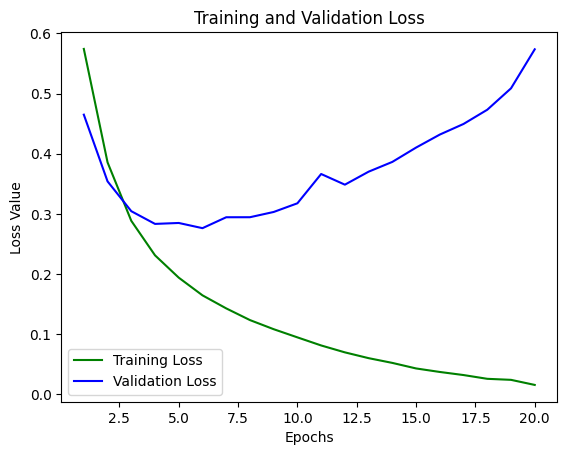

In [ ]:
# Extract loss values
loss_values = history_dict['loss']  # Training loss
val_loss_values = history_dict['val_loss']  # Validation loss
# Get the number of epochs
epochs = range(1, len(loss_values) + 1)
# Plot training and validation loss
plt.plot(epochs, loss_values, 'g', label="Training Loss")  # Green line for training loss
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")  # Blue line for validation loss
# Formatting the plot
plt.title('Training and Validation Loss')  # Title of the plot
plt.xlabel('Epochs')  # X-axis label
plt.ylabel('Loss Value')  # Y-axis label
plt.legend()  # Show legend (Training Loss, Validation Loss)
# Display the plot
plt.show()

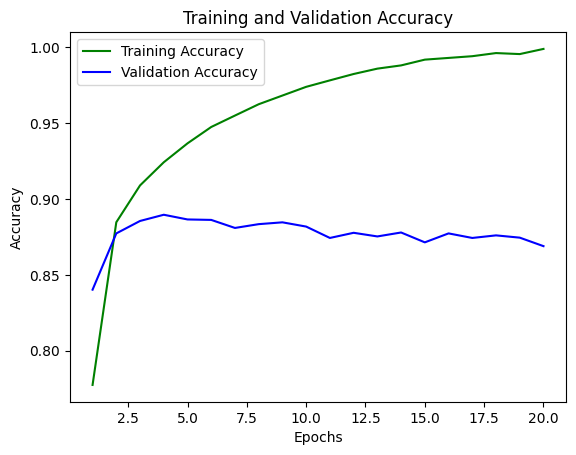

In [ ]:
# Extract accuracy values
acc_values = history_dict['binary_accuracy']  # Training accuracy
val_acc_values = history_dict['val_binary_accuracy']  # Validation accuracy

# Get the number of epochs
epochs = range(1, len(acc_values) + 1)

# Plot training and validation accuracy
plt.plot(epochs, acc_values, 'g', label="Training Accuracy")  # Green line for training accuracy
plt.plot(epochs, val_acc_values, 'b', label="Validation Accuracy")  # Blue line for validation accuracy

# Formatting the plot
plt.title('Training and Validation Accuracy')  # Title of the plot
plt.xlabel('Epochs')  # X-axis label
plt.ylabel('Accuracy')  # Y-axis label
plt.legend()  # Show legend (Training Accuracy, Validation Accuracy)

# Display the plot
plt.show()

In [ ]:
# Retrain the model for only 3 epochs
history = model.fit(
    partial_X_train,  # Training data (excluding validation set)
    partial_y_train,  # Training labels
    epochs=3,  # Train for only 3 epochs
    batch_size=512,  # Process 512 samples per batch
    validation_data=(X_val, y_val)  # Validate using the validation set
)

Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - binary_accuracy: 0.9986 - loss: 0.0166 - val_binary_accuracy: 0.8622 - val_loss: 0.5612
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - binary_accuracy: 0.9989 - loss: 0.0124 - val_binary_accuracy: 0.8703 - val_loss: 0.5685
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - binary_accuracy: 0.9994 - loss: 0.0094 - val_binary_accuracy: 0.8687 - val_loss: 0.5825


In [ ]:
# Suppress scientific notation for better readability
np.set_printoptions(suppress=True)
# Make predictions on test data
result = model.predict

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step


In [ ]:
result

array([[0.00985966],
       [1.        ],
       [0.9101217 ],
       ...,
       [0.00334621],
       [0.00805846],
       [0.9352054 ]], dtype=float32)

In [ ]:
# Initialize an array of zeros to store predicted labels
y_pred = np.zeros(len(result))
# Convert probabilities to binary labels (0 or 1)
for i, score in enumerate(result):
    y_pred[i] = np.round(score)

<ipython-input-24-b3b99a069ad7>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred[i] = np.round(score)


In [ ]:
from sklearn import metrics
# Compute Mean Absolute Error (MAE)
mae = metrics.mean_absolute_error(y_test, y_pred)

In [ ]:
mae

0.14064